# Fordgo Bike Services, San Fransisco Bay Area

## Visualization Overview
The dataset of the month of August,2020 was used for this visulization, the dataset contained 154,967 trip records
The dataset was cleaned and 5 columns were selected for further exploratory and explanatory analysis.
The columns are rideable_type,member_casual,distance in km,duration of trips in minutes and weekdays.


In [11]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bikes = pd.read_csv('fordgobike_master.csv')

In [3]:
bikes.head()

,rideable_type,started_at,ended_at,member_casual,weekday,duration,distance_km
0,electric_bike,2020-07-31 17:36:17,2020-07-31 17:48:13,casual,Friday,11.933333,2.115477
1,electric_bike,2020-07-31 19:42:50,2020-07-31 19:49:54,casual,Friday,7.066667,0.002209
2,electric_bike,2020-07-31 17:18:46,2020-07-31 17:36:31,casual,Friday,17.750000,3.106870
3,electric_bike,2020-07-31 20:48:47,2020-07-31 21:05:04,casual,Friday,16.283333,2.474800
4,electric_bike,2020-07-31 20:18:24,2020-07-31 20:24:26,casual,Friday,6.033333,0.684872


## Distribution of distance in km

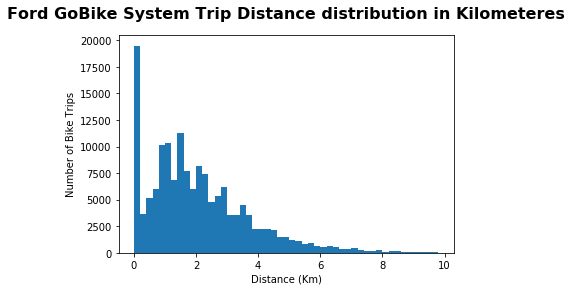

In [4]:
bin_edges = np.arange(0,10,0.2)
plt.hist(data = bikes, x = 'distance_km',bins = bin_edges);
plt.title("Ford GoBike System Trip Distance distribution in Kilometeres", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Km)')
plt.ylabel('Number of Bike Trips');


The distribution above is rightly skewed.More trips are taken at shorter distances and few trips are taken for longer distances.

## Distribution of Duration

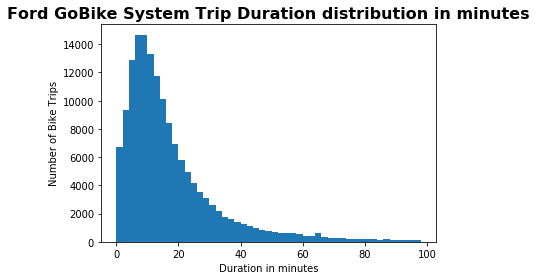

In [5]:
bin_edges = np.arange(0,100,2)
plt.hist(data = bikes, x = 'duration',bins = bin_edges);
plt.title("Ford GoBike System Trip Duration distribution in minutes", y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of Bike Trips');


The same distribution adheres to duration,shorter trips are taken more than longer trips.

## How are weekdays distributed?

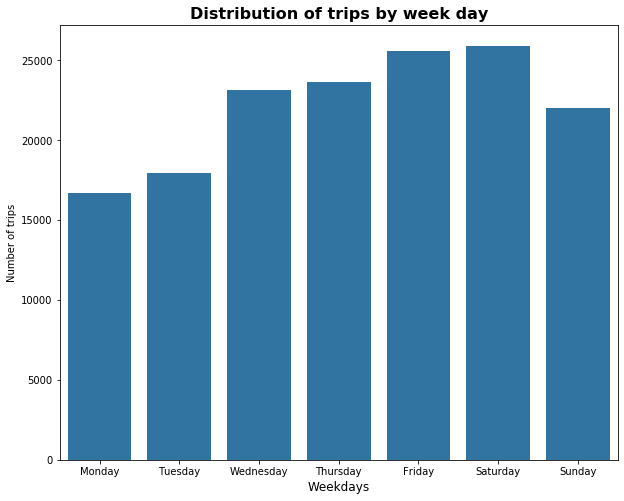

In [6]:
plt.figure(figsize = [10, 8])
orderby = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'weekday', color = color,order = orderby)
plt.title('Distribution of trips by week day',y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays', fontsize = 12)
plt.ylabel('Number of trips');

More trips are taken on Fridays and Saturdays.Monday has the least number of trips

## How is the bike type distributed?

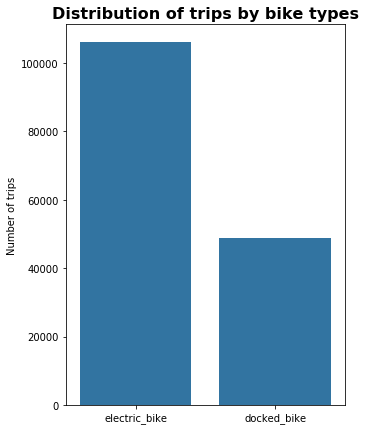

In [7]:
plt.figure(figsize = [5, 7])
color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'rideable_type', color = color)
plt.title('Distribution of trips by bike types',y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of trips');


Electric bikes are used more for trips than docked bikes

## How are Users distributed

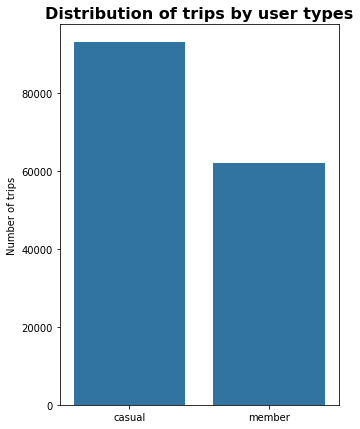

In [8]:
plt.figure(figsize = [5, 7])
color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'member_casual', color = color)
plt.title('Distribution of trips by user types',y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of trips');

Casual users takes more trips that member users do

## Which bike type is used for longer distances?

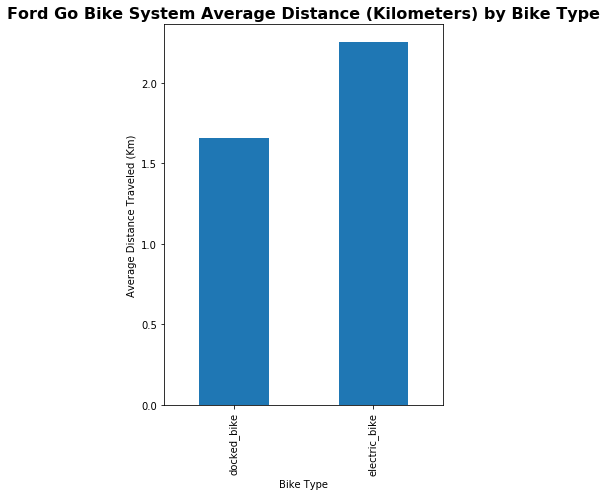

In [9]:
plt = bikes.groupby('rideable_type')['distance_km'].mean().plot(kind='bar', figsize=(5,7));
plt.set_title('Ford Go Bike System Average Distance (Kilometers) by Bike Type', y=1.0, fontsize=16, fontweight='bold')
plt.set_xlabel('Bike Type')
plt.set_ylabel('Average Distance Traveled (Km)');

Using the averages of distance to compare the bike types,electric bikes are used mostly for longer distance and docked type is used for shorter distance

## What day of the week take longer distance?

<Figure size 720x576 with 0 Axes>

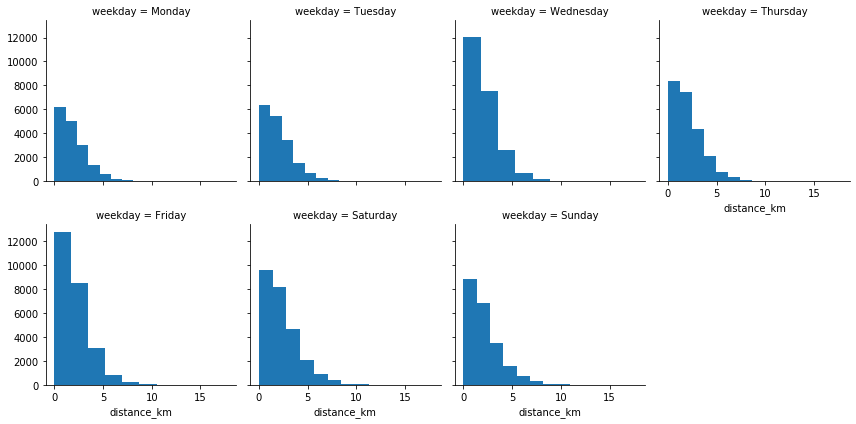

In [12]:
plt.figure(figsize = [10, 8])
g = sb.FacetGrid(data = bikes, col = 'weekday',col_wrap = 4,col_order = orderby);
plt.title("Ford GoBike System weekdays distribution ", y=1.0, fontsize=16, fontweight='bold')
g.map(plt.hist, "distance_km");


From the respective distribution of each week, Fridays,saturdays and sundays go on long distance trips of up to 10km or more

## Which Bike type is faster

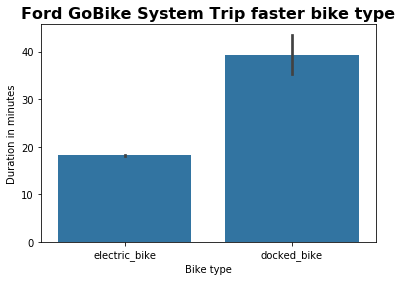

In [13]:
sb.barplot(data=bikes, x='rideable_type', y='duration', color=color);
plt.title("Ford GoBike System Trip faster bike type", y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Bike type');
plt.ylabel('Duration in minutes');

As electric bikes go on longer trips,they intend to have shorter duration meaning that they are way faster than docked bikes.

## Correlation between distance and duration_km

Text(0.5, 1.0, 'Ford GoBike System Trip relationship between distance and duration')

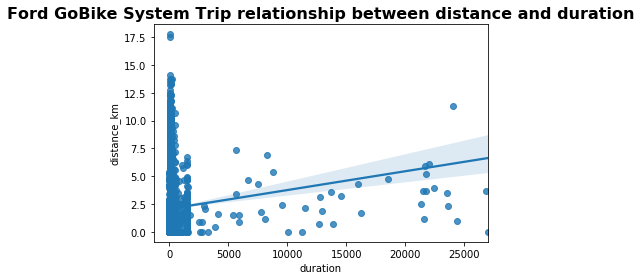

In [14]:
sb.regplot(data = bikes, x = 'duration', y = 'distance_km');
plt.title("Ford GoBike System Trip relationship between distance and duration", y=1.0, fontsize=16, fontweight='bold')

In [15]:
bikes.corr()['duration']

duration       1.000000
distance_km    0.026675
Name: duration, dtype: float64

There seems to be little or no correlation between distance and duration.The scatter plots is also showing evidently that there are a lot of outliers for duration.

## How does duration vary accross weekdays in respect to bike type selection?

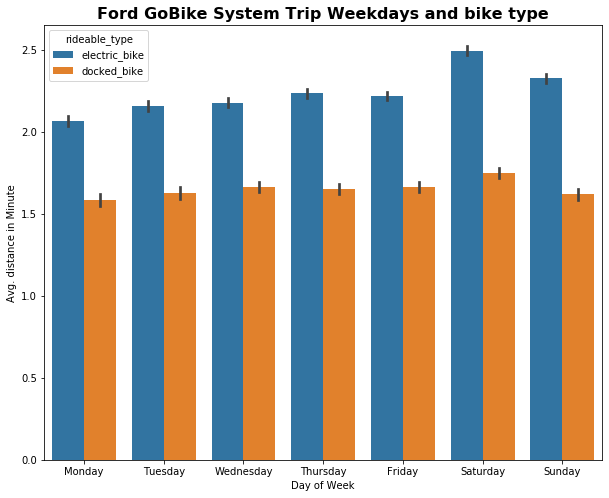

In [16]:
plt.figure(figsize = [10, 8])
sb.barplot(data=bikes, x='weekday', y='distance_km', hue='rideable_type', dodge=0.3,order = orderby);
plt.title("Ford GoBike System Trip Weekdays and bike type", y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Avg. distance in Minute');

From the above distribution,it is concluded that electric bikes are selected for longer distances since they are faster,also,saturday and sundays take longer trips.

## What bike types do customers prefer in respect to duration

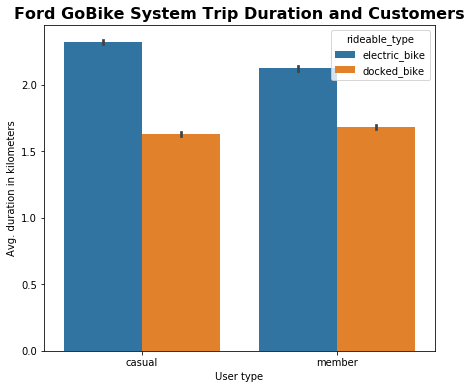

In [17]:
plt.figure(figsize = [7, 6])

sb.barplot(data=bikes, x='member_casual', y="distance_km", hue="rideable_type");
plt.title("Ford GoBike System Trip Duration and Customers", y=1.0, fontsize=16, fontweight='bold')
plt.xlabel('User type');
plt.ylabel('Avg. duration in kilometers');

C:\Users\ASHAROX\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASHAROX\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


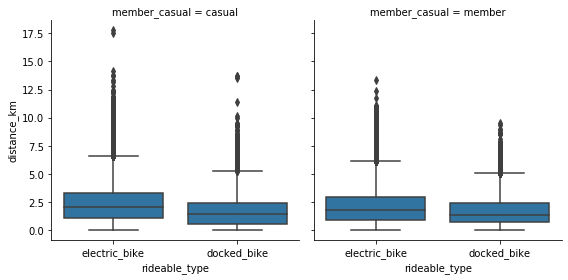

In [18]:
g = sb.FacetGrid(data = bikes, col = 'member_casual', size = 4)
g.map(sb.boxplot, 'rideable_type', 'distance_km')

From the visulizations above,electric bikes are preffred mostly from both user types for trips. Casual user types also takes more longer trips than members do. 

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'visualization.ipynb'])

0